<div class="alert alert-success">

<b></b> <a class="tocSkip"></a>

# Table of Contents

1. [**Project Description**](#**Project-Description**)
2. [**Part 1. Prioritizing Hypotheses**](#**Part-1.-Prioritizing-Hypotheses**)
   - [Prioritizing Hypotheses](#prioritizing-hypotheses)
3. [**Part 2. A/B Testing Analysis**](#**Part-2.-A/B-Testing-Analysis**)
   - [A/B Testing Analysis](#ab-testing-analysis)
   - [Data Quality Checking](#data-quality-checking)
   - [Data Preparation](#data-preparation)
   - [Plot cumulative income by group](#plot-cumulative-income-by-group)
   - [Plot the cumulative average order size by group](#Plot-the-cumulative-average-order-size-by-group)
   - [Describe the relative differences for group B's cumulative average order size compared to group A](#Describe-the-relative-differences-for-group-B's-cumulative-average-order-size-compared-to-group-A)
   - [Plot cumulative conversions by cohort](#Plot-cumulative-conversions-by-cohort)
   - [Describe the relative differences for group B's cumulative conversion rate compared to group A](#Describe-the-relative-differences-for-group-B's-cumulative-conversion-rate-compared-to-group-A)
   - [Calculate the conversion rate for each group as the ratio of orders to the number of visits each day. Graph the daily conversion rates of both groups and explain the differences.](#Calculate-the-conversion-rate-for-each-group-as-the-ratio-of-orders-to-the-number-of-visits-each-day.-Graph-the-daily-conversion-rates-of-both-groups-and-explain-the-differences.)
   - [Create a scatter chart for the number of orders per user](#Create-a-scatter-chart-for-the-number-of-orders-per-user)
   - [Calculate the 95th and 99th percentiles for the number of orders per user. Determine the point when a data point turns into an anomaly.](#Calculate-the-95th-and-99th-percentiles-for-the-number-of-orders-per-user.-Determine-the-point-when-a-data-point-turns-into-an-anomaly)

   - [Create a scatter chart for order prices](#create-a-scatter-chart-for-order-prices)
   - [Calculate the 95th and 99th percentiles for order prices. Determine the point when a data point turns into an anomaly.](#Calculate-the-95th-and-99th-percentiles-for-order-prices.-Determine-the-point-when-a-data-point-turns-into-an-anomaly.)
   - [Find the statistical significance of conversion differences between groups using raw data](#Find-the-statistical-significance-of-conversion-differences-between-groups-using-raw-data)
   - [Find the statistical significance of differences in average order size between groups using raw data](#Find-the-statistical-significance-of-differences-in-average-order-size-between-groups-using-raw-data)
   - [Find the statistical significance of conversion differences between groups using filtered data](#Find-the-statistical-significance-of-conversion-differences-between-groups-using-filtered-data)
   - [Find the statistical significance of differences in average order size between groups using filtered data](#Find-the-statistical-significance-of-differences-in-average-order-size-between-groups-using-filtered-data)
5. [**Conclusions and Decisions based on Testing**](#**Conclusions-and-Decisions-based-on-Testing**)
   

# **Project Description**

As a data analyst at a large online store. You and your marketing team have compiled a list of hypotheses to help increase revenue.

So, your job is to prioritize these hypotheses, run A/B testing, and analyze the results.

Make sure to pre-process the data first, OK? It is possible that the original dataset you have contains errors; for example, some visitors may be in group A or group B.

## **Part 1. Prioritizing Hypotheses**

The hypotheses_us.csv file contains nine hypotheses for increasing online store revenue with Reach, Impact, Confidence, and Effort specified for each hypothesis.

The task is:

- Apply the ICE framework to prioritize hypotheses. Sort the hypotheses in descending order of priority.
    
- Applying the RICE framework to prioritize hypotheses. Sort the hypotheses in descending order of priority.
    
- Shows hypothetical priority changes when RICE is implemented to replace ICE. Provide an explanation regarding the changes.

## **Part 2. A/B Testing Analysis**

You have done A/B testing and got the results as described in the orders_us.csv and visitors_us.csv files.

The Task:

Analyzing A/B testing:

- Describe cumulative income by group. Make conclusions and assumptions.
    
- Plot the cumulative average order size by group. Make conclusions and assumptions.
    
- Describe the relative differences for group B's cumulative average order size compared to group A. Draw conclusions and assumptions.
    
- Plot cumulative conversions by group. Make conclusions and assumptions.
    
- Describe the relative differences for group B's cumulative conversion rate compared to group A. Make conclusions and assumptions.
    
- Calculate the conversion rate of each group as the ratio of orders to the number of visits each day. Graph the daily conversion rates of both groups and explain the differences. Make conclusions and assumptions.    
- Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buat kesimpulan dan asumsinya.
    
- Calculate the 95th and 99th percentiles for the number of orders per user. Determine the point when a data point turns into an anomaly.
    
- Create a scatter chart for order prices. Make conclusions and assumptions.
    
- Calculate the 95th and 99th percentiles for order prices. Determine the point when a data point turns into an anomaly.
    
- Find the statistical significance of conversion differences between groups using raw data. Make conclusions and assumptions.
    
- Find statistical significance of differences in average order size between groups using raw data. Make conclusions and assumptions.
    
- Find the statistical significance of conversion differences between groups using filtered data. Make conclusions and assumptions.
    
- Find the statistical significance of differences in average order size between groups using filtered data. Make conclusions and assumptions.

  
## Make decisions based on test results. Possible decisions are:

1. Stop testing, and consider one of the groups as a leader.
    
    
2. Stop testing, and conclude that there is no difference between the two groups.
    
    
3. Continue testing.    


### Prioritizing Hypotheses

In [5]:
# Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [10]:
# Load Data Hypothesis
path_hypothesis = 'hypotheses_us.csv'
hypo = pd.read_csv(path_hypothesis, sep=';')
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [11]:
# Menerapkan framework ICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
hypo['ICE'] = round(hypo['Impact'] * hypo['Confidence'] / hypo['Effort'], 1)
hypo

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.3
1,Launch your own delivery service. This will sh...,2,5,4,10,2.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.0
3,Change the category structure. This will incre...,8,3,3,8,1.1
4,Change the background color on the main page. ...,3,1,1,1,1.0
5,Add a customer review page. This will increase...,3,2,2,3,1.3
6,Show banners with current offers and sales on ...,5,3,8,3,8.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.2
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.2


In [12]:
# Menerapkan framework RICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
hypo['RICE'] = round(hypo['Reach'] * hypo['Impact'] * hypo['Confidence'] / hypo['Effort'], 1)
hypo

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.3,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.0,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.0,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.1,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.0,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.3,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.0,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.2,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.2,16.2


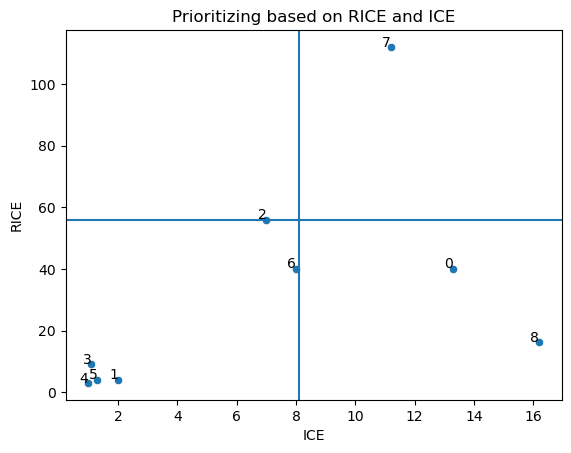

In [13]:
# Menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE.
sns.scatterplot(data=hypo, x='ICE', y='RICE')
plt.title('Prioritizing based on RICE and ICE')

#add horizontal line
plt.axhline(y=56)

#add vertical line
plt.axvline(x=8.1)
for line in range(0, hypo.shape[0]):
     plt.text(hypo.ICE[line], hypo.RICE[line]+0.2, hypo.index[line], horizontalalignment='right', size='medium', color='black')
plt.show()


<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

- Project number 7 is high RICE and high ICE means very priority
- Project numbers 0 and 8 are low RICE and high ICE, meaning that the impact and confidence are quite high but the reach is low
- The remaining projects are low RICE and low ICE projects, meaning that these projects have low impact, reach and confidence and are given the lowest priority.
</div>


### A/B Testing Analysis

In [ ]:
# Order Dataset
path_order = '/content/orders_us.csv'
orders = pd.read_csv(path_order)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [ ]:
# Visit Dataset
path_visit = '/content/visits_us.csv'
visits = pd.read_csv(path_visit)
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Data Quality Checking

In [ ]:
# cek duplikasi dan missing value
print('duplikasi', orders.duplicated().sum())
orders.isnull().sum()

duplikasi 0


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
# cek duplikasi dan missing value
print(visits.duplicated().sum())
visits.isnull().sum()

0


date      0
group     0
visits    0
dtype: int64

### Data Preparation

In [ ]:
# Ubah tipe data menjadi datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [ ]:
# Group by data total revenue
total_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
total_revenue.head()

,date,group,revenue
0,2019-08-01,A,2356.8
1,2019-08-01,B,1620.0
2,2019-08-02,A,1503.5
3,2019-08-02,B,2623.8
4,2019-08-03,A,1815.2


In [ ]:
# Group by data total orders
total_orders = orders.groupby(['date', 'group'])['revenue'].count().reset_index().rename(columns={'revenue':'orders'})
total_orders.head()

,date,group,orders
0,2019-08-01,A,24
1,2019-08-01,B,21
2,2019-08-02,A,20
3,2019-08-02,B,24
4,2019-08-03,A,24


In [ ]:
# Group by data total buyers
total_buyers = orders.groupby(['date', 'group'])['visitorId'].nunique().reset_index().rename(columns={'visitorId':'buyers'})
total_buyers.head()

,date,group,buyers
0,2019-08-01,A,20
1,2019-08-01,B,20
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24


In [ ]:
# Join semua dataset
data = visits.merge(total_revenue, on=['date', 'group'], how='left')
data = data.merge(total_orders, on=['date', 'group'], how='left')
data = data.merge(total_buyers, on=['date', 'group'], how='left')
data

,date,group,visits,revenue,orders,buyers
0,2019-08-01,A,719,2356.8,24,20
1,2019-08-02,A,619,1503.5,20,19
2,2019-08-03,A,507,1815.2,24,24
3,2019-08-04,A,717,1146.6,16,15
4,2019-08-05,A,756,1988.1,25,25
...,...,...,...,...,...,...
57,2019-08-27,B,720,2319.8,16,16
58,2019-08-28,B,654,1558.0,28,27
59,2019-08-29,B,531,3623.7,20,20
60,2019-08-30,B,490,3393.3,24,24


In [ ]:
# Pisahkan kedua dataset
group_a = data.loc[data['group'] == 'A']
group_b = data.loc[data['group'] == 'B']

### Plot cumulative income by group.

In [ ]:
group_a['cumu_revenue'] = group_a['revenue'].cumsum()
group_a.tail()

group_a.tail()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\3628874863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['cumu_revenue'] = group_a['revenue'].cumsum()


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders,avg_rev_per_order,cumu_visits,conversion
26,2019-08-27,A,711,4511.1,28,28,55601.1,495,112.325455,16376,0.030227
27,2019-08-28,A,594,1602.6,17,17,57203.7,512,111.725977,16970,0.030171
28,2019-08-29,A,577,4995.5,22,22,62199.2,534,116.477903,17547,0.030433
29,2019-08-30,A,490,1364.3,11,10,63563.5,545,116.630275,18037,0.030216
30,2019-08-31,A,699,991.4,12,12,64554.9,557,115.897487,18736,0.029729


In [ ]:
group_b['cumu_revenue'] = group_b['revenue'].cumsum()
group_b.tail()

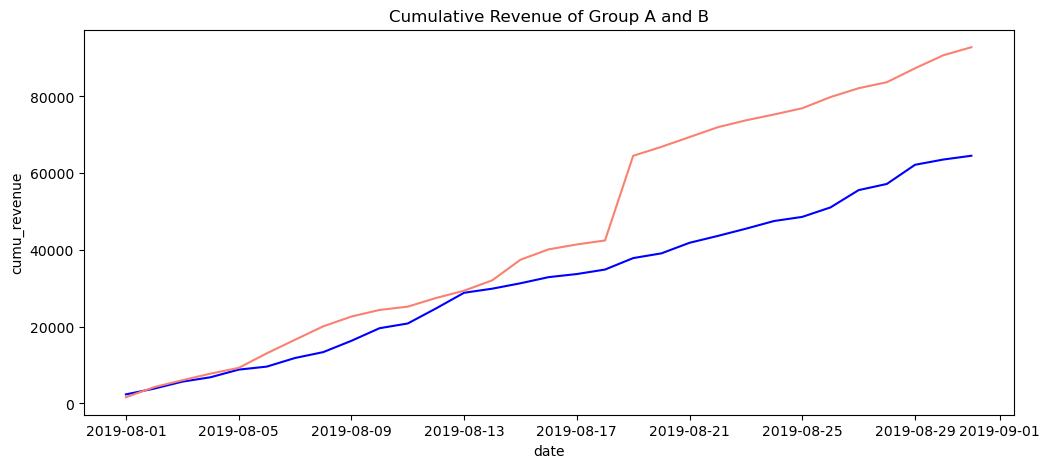

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Cumulative Revenue of Group A and B')
sns.lineplot(data=group_a, x='date', y='cumu_revenue', color='blue')
sns.lineplot(data=group_b, x='date', y='cumu_revenue', color='salmon')
plt.show()

### Plot the cumulative average order size by group.

In [ ]:
# Count cumulatif order a
group_a['cumu_orders'] = group_a['orders'].cumsum()
group_a.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\2007231368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['cumu_orders'] = group_a['orders'].cumsum()


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders
0,2019-08-01,A,719,2356.8,24,20,2356.8,24
1,2019-08-02,A,619,1503.5,20,19,3860.3,44
2,2019-08-03,A,507,1815.2,24,24,5675.5,68
3,2019-08-04,A,717,1146.6,16,15,6822.1,84
4,2019-08-05,A,756,1988.1,25,25,8810.2,109


In [ ]:
# count cumulatif order b
group_b['cumu_orders'] = group_b['orders'].cumsum()
group_b.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\1771969570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['cumu_orders'] = group_b['orders'].cumsum()


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders
31,2019-08-01,B,713,1620.0,21,20,1620.0,21
32,2019-08-02,B,581,2623.8,24,23,4243.8,45
33,2019-08-03,B,509,1806.8,16,16,6050.6,61
34,2019-08-04,B,770,1717.3,17,16,7767.9,78
35,2019-08-05,B,707,1495.0,23,23,9262.9,101


In [ ]:
# Hitung average revenue kumulatif dibagi sama order kumulatif
group_a['avg_rev_per_order'] = group_a['cumu_revenue'] / group_a['cumu_orders']
group_a.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\756769735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['avg_rev_per_order'] = group_a['cumu_revenue'] / group_a['cumu_orders']


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders,avg_rev_per_order
0,2019-08-01,A,719,2356.8,24,20,2356.8,24,98.200000
1,2019-08-02,A,619,1503.5,20,19,3860.3,44,87.734091
2,2019-08-03,A,507,1815.2,24,24,5675.5,68,83.463235
3,2019-08-04,A,717,1146.6,16,15,6822.1,84,81.215476
4,2019-08-05,A,756,1988.1,25,25,8810.2,109,80.827523


In [ ]:
# Hitung average revenue kumulatif dibagi sama order kumulatif
group_b['avg_rev_per_order'] = group_b['cumu_revenue'] / group_b['cumu_orders']
group_b.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\3965167468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['avg_rev_per_order'] = group_b['cumu_revenue'] / group_b['cumu_orders']


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders,avg_rev_per_order
31,2019-08-01,B,713,1620.0,21,20,1620.0,21,77.142857
32,2019-08-02,B,581,2623.8,24,23,4243.8,45,94.306667
33,2019-08-03,B,509,1806.8,16,16,6050.6,61,99.190164
34,2019-08-04,B,770,1717.3,17,16,7767.9,78,99.588462
35,2019-08-05,B,707,1495.0,23,23,9262.9,101,91.711881


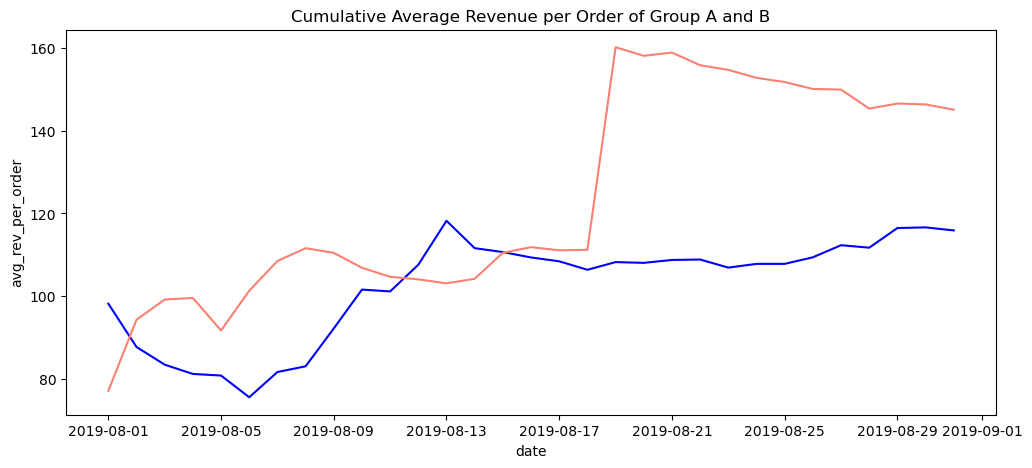

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Cumulative Average Revenue per Order of Group A and B')
sns.lineplot(data=group_a, x='date', y='avg_rev_per_order', color='blue')
sns.lineplot(data=group_b, x='date', y='avg_rev_per_order', color='salmon')
plt.show()

### Describe the relative differences for group B's cumulative average order size compared to group A.


In [ ]:
# Gabungkan kedua data group A dan B
compare = group_a[['date', 'avg_rev_per_order']].merge(group_b[['date', 'avg_rev_per_order']], on='date', how='inner').rename(
    columns = {'avg_rev_per_order_x': 'avg_rev_a', 'avg_rev_per_order_y': 'avg_rev_b'}
)
compare.head()

,date,avg_rev_a,avg_rev_b
0,2019-08-01,98.200000,77.142857
1,2019-08-02,87.734091,94.306667
2,2019-08-03,83.463235,99.190164
3,2019-08-04,81.215476,99.588462
4,2019-08-05,80.827523,91.711881


In [ ]:
# Hitung relative comparison. kalau value lebih dari 0 artinya B lebih baik, vice versa
compare['relative'] = compare['avg_rev_b'] / compare['avg_rev_a'] - 1
compare.head()

,date,avg_rev_a,avg_rev_b,relative
0,2019-08-01,98.200000,77.142857,-0.214431
1,2019-08-02,87.734091,94.306667,0.074915
2,2019-08-03,83.463235,99.190164,0.188429
3,2019-08-04,81.215476,99.588462,0.226225
4,2019-08-05,80.827523,91.711881,0.134662


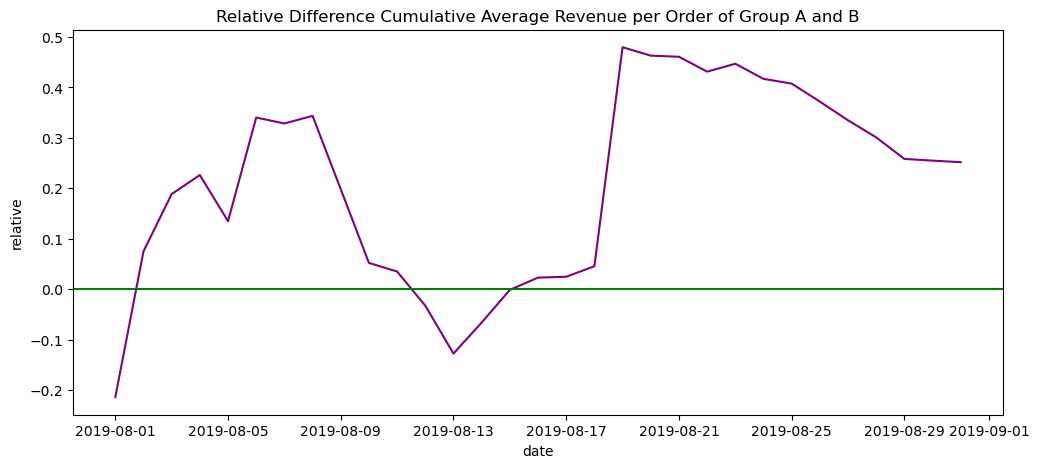

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Relative Difference Cumulative Average Revenue per Order of Group A and B')
sns.lineplot(data=compare, x='date', y='relative', color='purple')
#add horizontal line
plt.axhline(y=0, color='green')
plt.show()

### Plot cumulative conversions by cohort

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()

In [ ]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitorId' : pd.Series.nunique, 'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [ ]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [ ]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

In [ ]:
# menghitung konversi kumulatif
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']


In [ ]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [ ]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

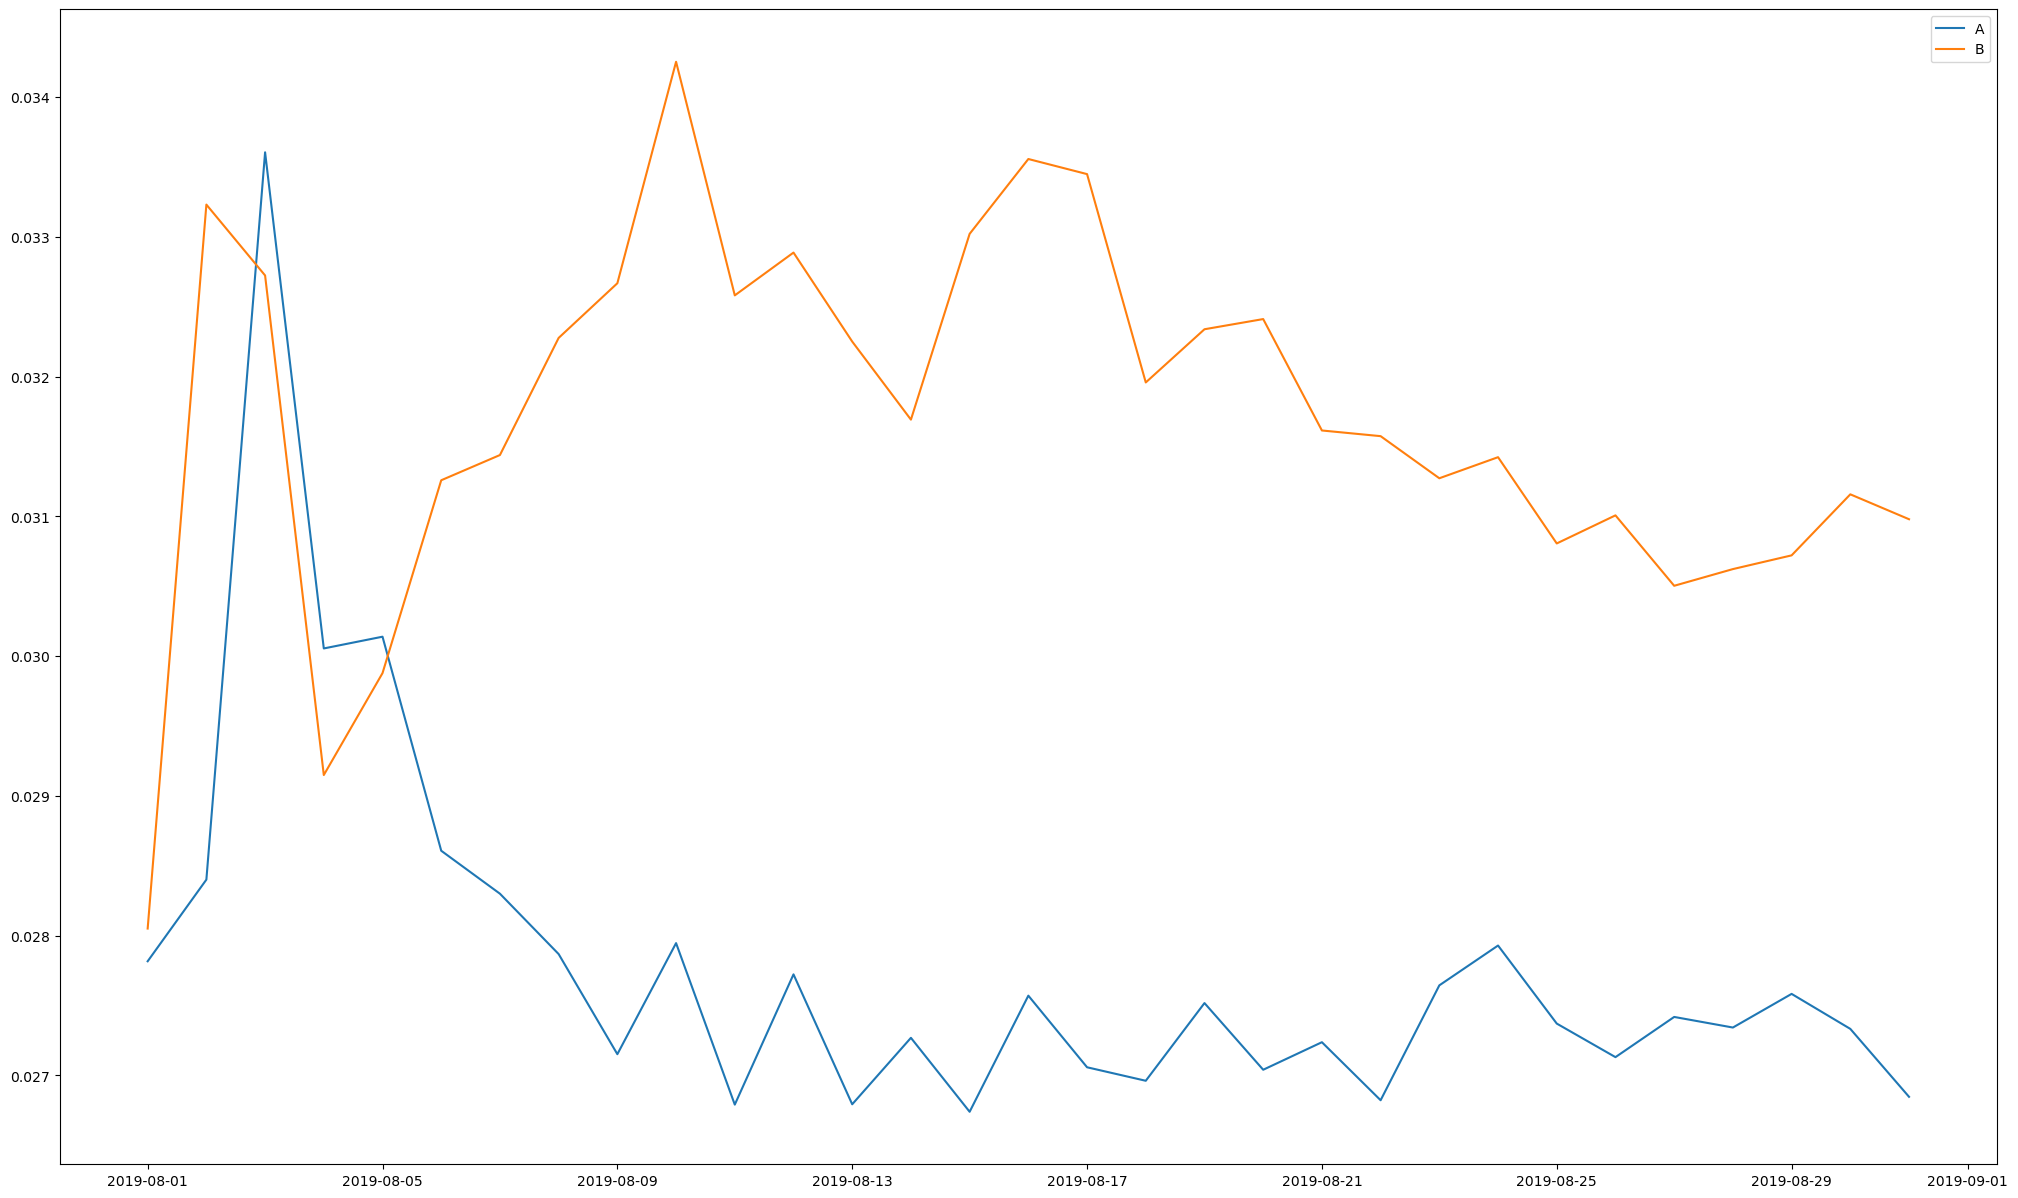

In [ ]:
plt.figure(figsize=(25, 15))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# mengatur skala sumbu

plt.legend()


<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

both groups fluctuate, but then the conversion rate of group B rises on 08-05-2019 and rises maximum on 08-09-2019, while the conversion rate of group A falls.

</div>


### Describe the relative differences for group B's cumulative conversion rate compared to group A

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

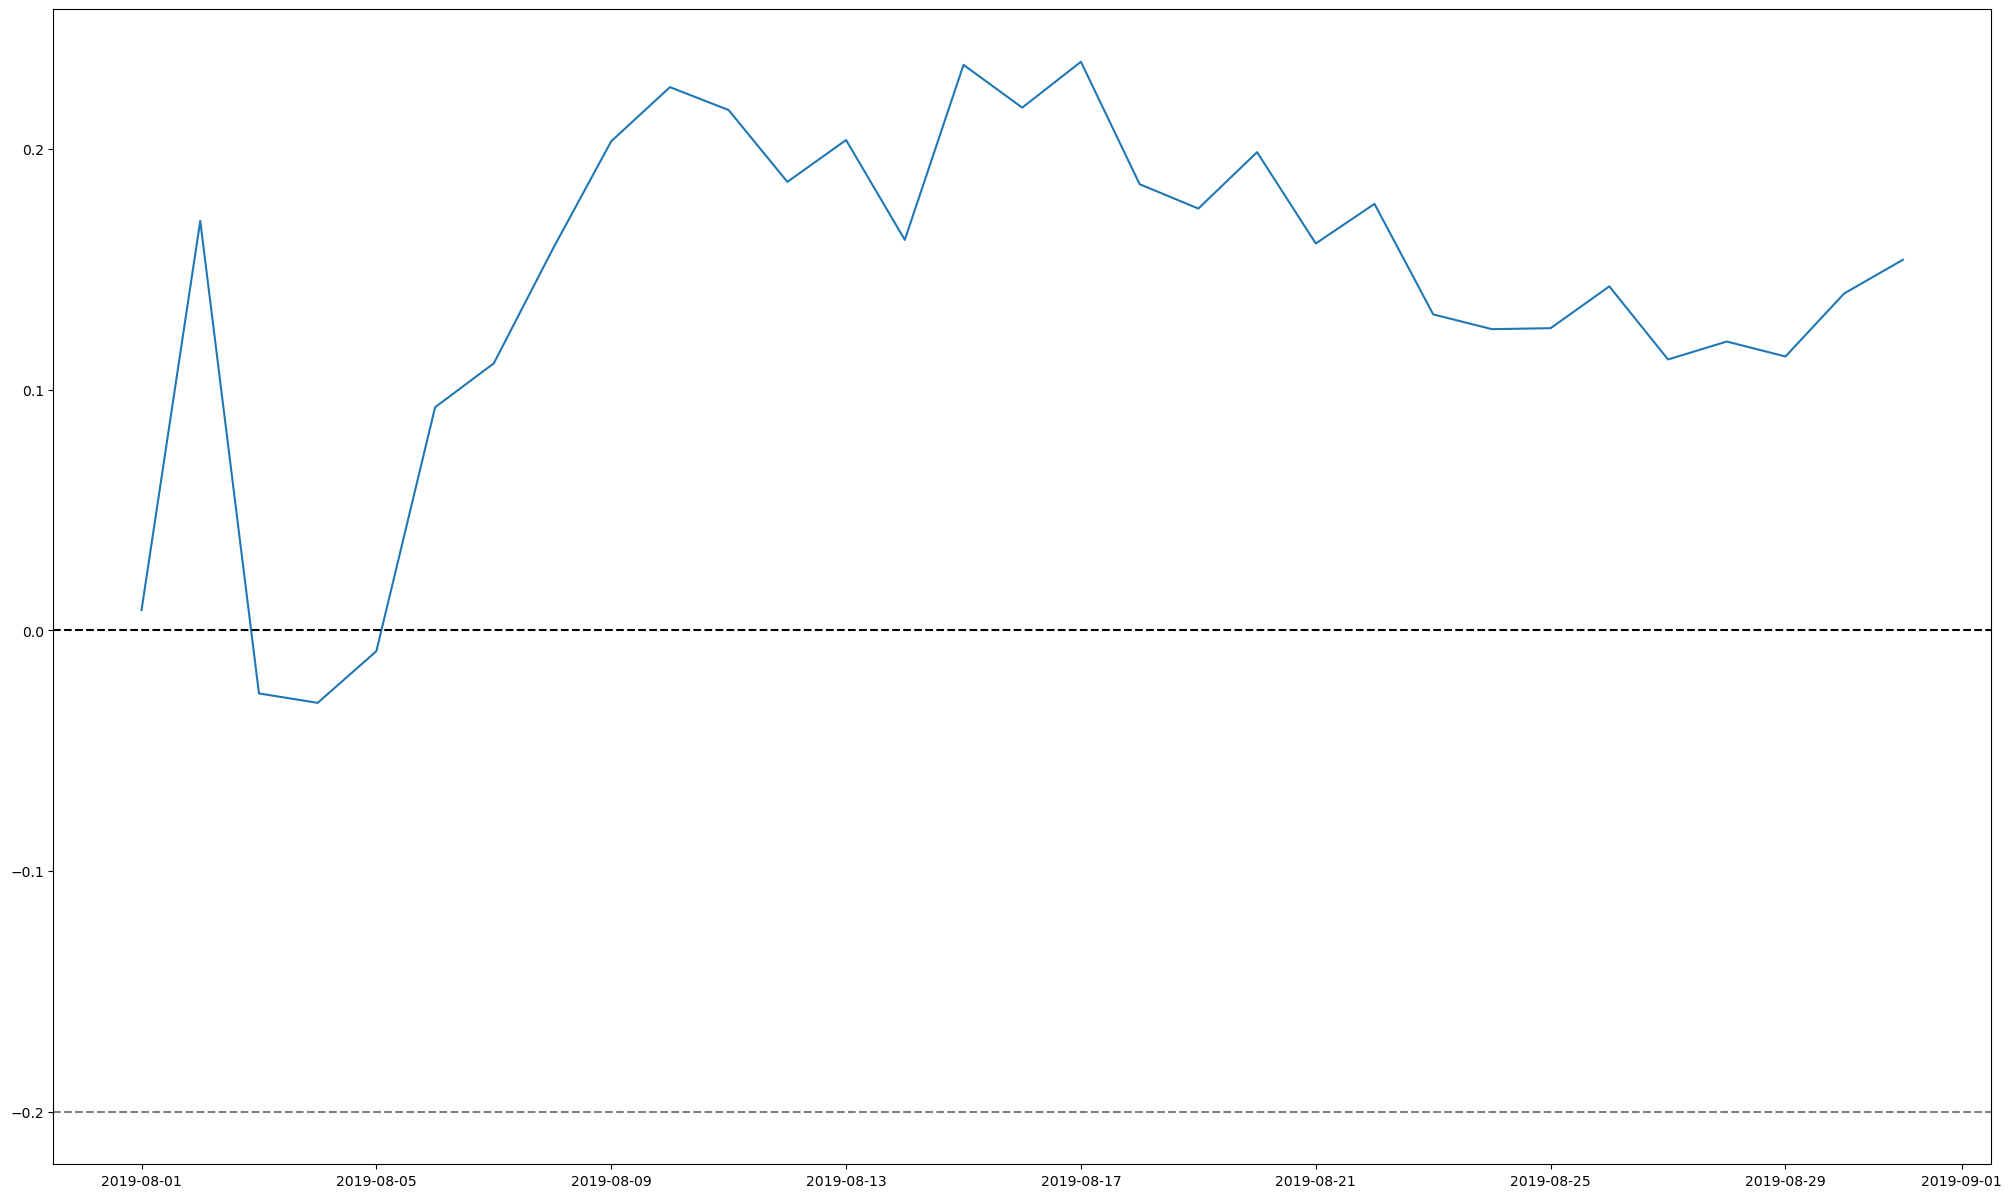

In [ ]:
plt.figure(figsize=(25, 15))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.2, color='grey', linestyle='--')


### Calculate the conversion rate for each group as the ratio of orders to the number of visits each day. Graph the daily conversion rates of both groups and explain the differences.

In [ ]:
# Hitung kumulatif order
group_a['cumu_visits'] = group_a['visits'].cumsum()
group_a.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\1897097776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['cumu_visits'] = group_a['visits'].cumsum()


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders,avg_rev_per_order,cumu_visits
0,2019-08-01,A,719,2356.8,24,20,2356.8,24,98.200000,719
1,2019-08-02,A,619,1503.5,20,19,3860.3,44,87.734091,1338
2,2019-08-03,A,507,1815.2,24,24,5675.5,68,83.463235,1845
3,2019-08-04,A,717,1146.6,16,15,6822.1,84,81.215476,2562
4,2019-08-05,A,756,1988.1,25,25,8810.2,109,80.827523,3318


In [ ]:
# Hitung kumulatif order
group_b['cumu_visits'] = group_b['visits'].cumsum()
group_b.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6200\1839146438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['cumu_visits'] = group_b['visits'].cumsum()


,date,group,visits,revenue,orders,buyers,cumu_revenue,cumu_orders,avg_rev_per_order,cumu_visits
31,2019-08-01,B,713,1620.0,21,20,1620.0,21,77.142857,713
32,2019-08-02,B,581,2623.8,24,23,4243.8,45,94.306667,1294
33,2019-08-03,B,509,1806.8,16,16,6050.6,61,99.190164,1803
34,2019-08-04,B,770,1717.3,17,16,7767.9,78,99.588462,2573
35,2019-08-05,B,707,1495.0,23,23,9262.9,101,91.711881,3280


In [ ]:
# Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buatlah kesimpulan dan asumsinya.
group_a['conversion'] = group_a['cumu_orders'] / group_a['cumu_visits']
group_b['conversion'] = group_b['cumu_orders'] / group_b['cumu_visits']

C:\Users\user\AppData\Local\Temp\ipykernel_6200\1538516057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['conversion'] = group_a['cumu_orders'] / group_a['cumu_visits']
C:\Users\user\AppData\Local\Temp\ipykernel_6200\1538516057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['conversion'] = group_b['cumu_orders'] / group_b['cumu_visits']


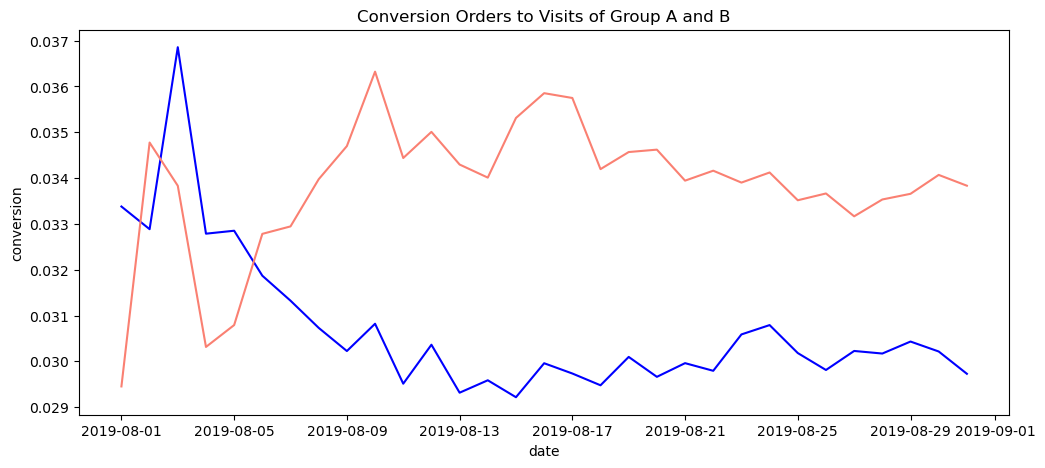

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Conversion Orders to Visits of Group A and B')
sns.lineplot(data=group_a, x='date', y='conversion', color='blue')
sns.lineplot(data=group_b, x='date', y='conversion', color='salmon')
plt.show()

In [ ]:
# Gabungkan kedua data group A dan B
compare = group_a[['date', 'conversion']].merge(group_b[['date', 'conversion']], on='date', how='inner').rename(
    columns = {'conversion_x': 'conversion_a', 'conversion_y': 'conversion_b'}
)
compare.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


In [ ]:
# Hitung relative comparison. kalau value lebih dari 0 artinya B lebih baik, vice versa
compare['relative'] = compare['conversion_b'] / compare['conversion_a'] - 1
compare.head(10)

,date,conversion_a,conversion_b,relative
0,2019-08-01,0.033380,0.029453,-0.117637
1,2019-08-02,0.032885,0.034776,0.057503
2,2019-08-03,0.036856,0.033833,-0.082045
3,2019-08-04,0.032787,0.030315,-0.075398
4,2019-08-05,0.032851,0.030793,-0.062659
5,2019-08-06,0.031870,0.032783,0.028655
6,2019-08-07,0.031324,0.032946,0.051764
7,2019-08-08,0.030731,0.033975,0.105562
8,2019-08-09,0.030225,0.034699,0.147998
9,2019-08-10,0.030821,0.036323,0.178524


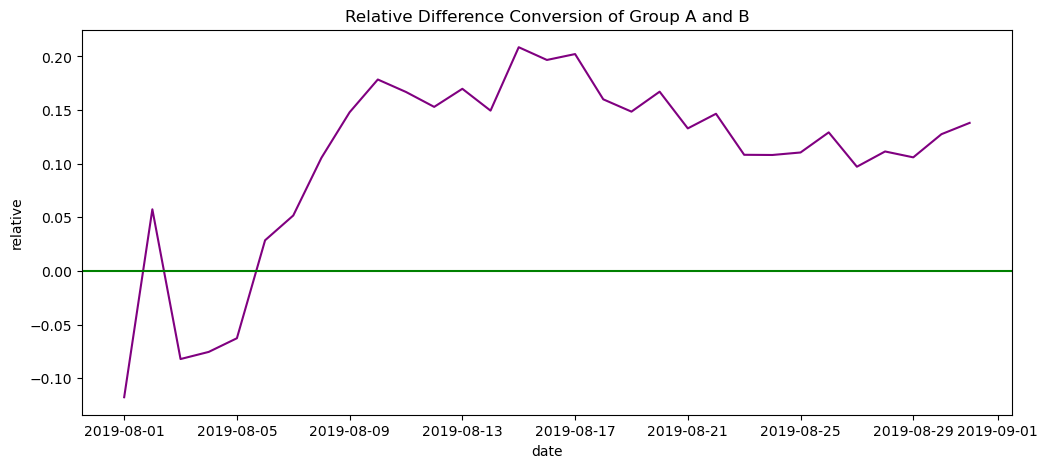

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Relative Difference Conversion of Group A and B')
sns.lineplot(data=compare, x='date', y='relative', color='purple')
#add horizontal line
plt.axhline(y=0, color='green')
plt.show()

<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

- If relative > 0 → Group B performed better than Group A on that day, If relative < 0 → Group A performed better than Group B on that day.

- Group B's performance improved steadily, suggesting a strong upward trend in conversions compared to Group A



### Create a scatter chart for the number of orders per user

In [ ]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [ ]:
ordersByUsers.columns = ['visitorId', 'orders']

In [ ]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))

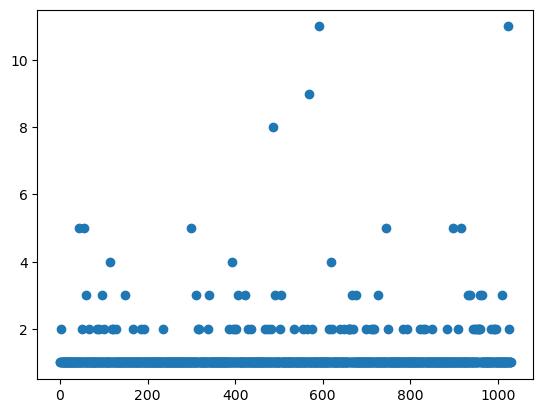

In [ ]:
plt.scatter(x_values, ordersByUsers['orders'])


<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

There are many users who place two to four orders

### Calculate the 95th and 99th percentiles for the number of orders per user. Determine the point when a data point turns into an anomaly.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

The number of users who made more than 2 orders does not exceed 5%, and those who made 4 orders is only 1%.

### Create a scatter chart for order prices

In [ ]:
orders.sort_values(by='revenue',ascending=False)

x_values = pd.Series(range(0,len(data['revenue'])))


orders.sort_values(by='revenue',ascending=False)


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
...,...,...,...,...,...
390,2415738512,2038680547,2019-08-25,5.2,A
414,2505918657,2524310328,2019-08-06,5.2,B
602,2356264591,1224903511,2019-08-09,5.1,A
404,2052514069,1995481842,2019-08-28,5.1,B


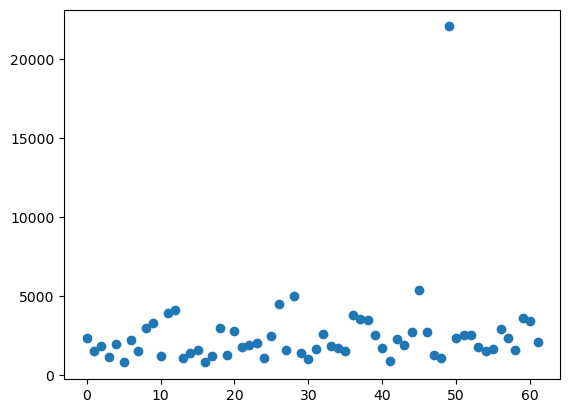

In [ ]:
plt.scatter(x_values, data['revenue'])

<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

The order amount at 5000 usd is not that much

### Calculate the 95th and 99th percentiles for order prices. Determine the point when a data point turns into an anomaly.    

In [ ]:
print(np.percentile(orders['revenue'], [95,99]))

[435.54  900.904]


<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

The amount of the order price that makes more than 435.54 USD does not exceed 5%, and the order price of 900.9 USD only accounts for 1%.

### Find the statistical significance of conversion differences between groups using raw data

In [ ]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np


In [ ]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [ ]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
#Selanjutnya, kita akan menghitung signifikansi statistik dari perbedaan tingkat konversi antar kelompok.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.sort_values(by=['orders'], ascending=False)

,userId,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4
...,...,...
167,1426761187,1
166,1422773200,1
165,1422476412,1
164,1414758703,1


In [ ]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.sort_values(by=['orders'], ascending=False)

,userId,orders
340,2458001652,6
326,2378935119,5
501,3717692402,4
514,3803269165,4
580,4256040402,4
...,...,...
190,1396482013,1
189,1395236619,1
188,1390677121,1
187,1388838483,1


In [ ]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [ ]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


0.017


In [ ]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.138


<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>

Based on the raw data that we use, it turns out that there are differences between groups A and B.

The first line of the resulting output gives us a p-value of 0.017, which is smaller than 0.05. Therefore, we can reject the null hypothesis because there is a statistically significant difference in conversion between groups. However, there was a relative increase from group B which was 13.8% (second line of output).


### Find the statistical significance of differences in average order size between groups using raw data

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252



<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>
    
The p value is much higher than 0.05, so we cannot reject the null hypothesis and conclude that the average order sizes between groups are different. However, the average order size for group B is indeed much larger than group A.

### Find the statistical significance of conversion differences between groups using filtered data    

In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithManyOrders.head()

227    2038680547
278    2458001652
499    4256040402
326    2378935119
340    2458001652
Name: userId, dtype: int64

In [ ]:
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']

In [ ]:
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [ ]:
abnormalUsers.head()

227    2038680547
326    2378935119
278    2458001652
499    4256040402
dtype: int64

In [ ]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.016
0.149


### Find the statistical significance of differences in average order size between groups using filtered data

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))



0.960
0.235



<div class="alert alert-success">
<b>Finding</b> <a class="tocSkip"></a>
    
- The p value increases, but now the difference between segments is 23% instead of 25%.
- Although our general conclusions from this test do not change, this example clearly shows how the presence of anomalies can affect the results of A/B testing!


## **Conclusions and Decisions based on Testing**

<div class="alert alert-success">

<b>Here are the facts</b> <a class="tocSkip"></a>

• Both raw data and filtered data showed statistically significant differences in conversion between groups.

• Both raw data and filtered data show statistically significant differences in average order size between groups.

• The graph showing the difference in conversion between groups shows that group B's results are better and show significant improvement

• The graph showing the difference in average order size between groups shows that group B's results are getting better day by day, higher than group A


<div class="alert alert-success">

<b>Based on these facts,</b> <a class="tocSkip"></a>

it can be concluded to stop testing, and consider group B as the leader. There is no point in continuing this test because it has already been found that the probability that segment B will be better than segment A exists.
